Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Data Ingestion: 11 marks
1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)
1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

Data Preparation: 4 marks
1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

Modeling: 22 marks
1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)
1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)
1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)
1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)


Inference: 5 marks
1.8 Based on these predictions, what are the insights? (5 marks)

1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Election_Data.xlsx')

In [3]:
df.shape

(1525, 10)

In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [6]:
df.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [9]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [10]:
df.duplicated().sum()

8

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [13]:
df.duplicated().sum()

0

**Univariate analysis**

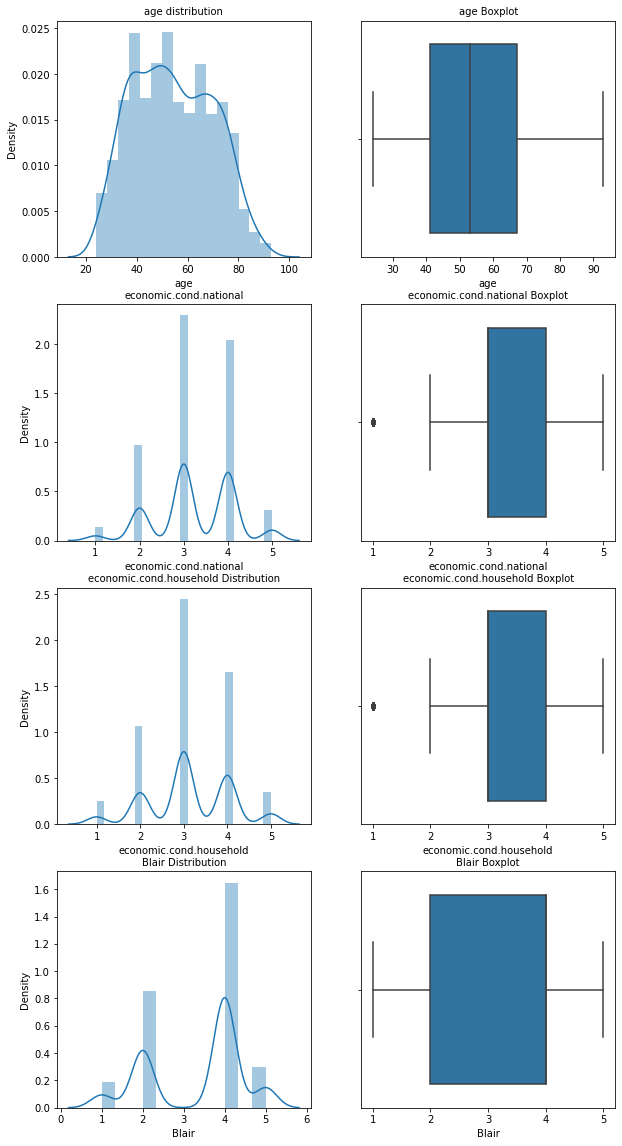

In [14]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)

a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a = sns.distplot(df['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(df['Blair'] , ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)

plt.show()

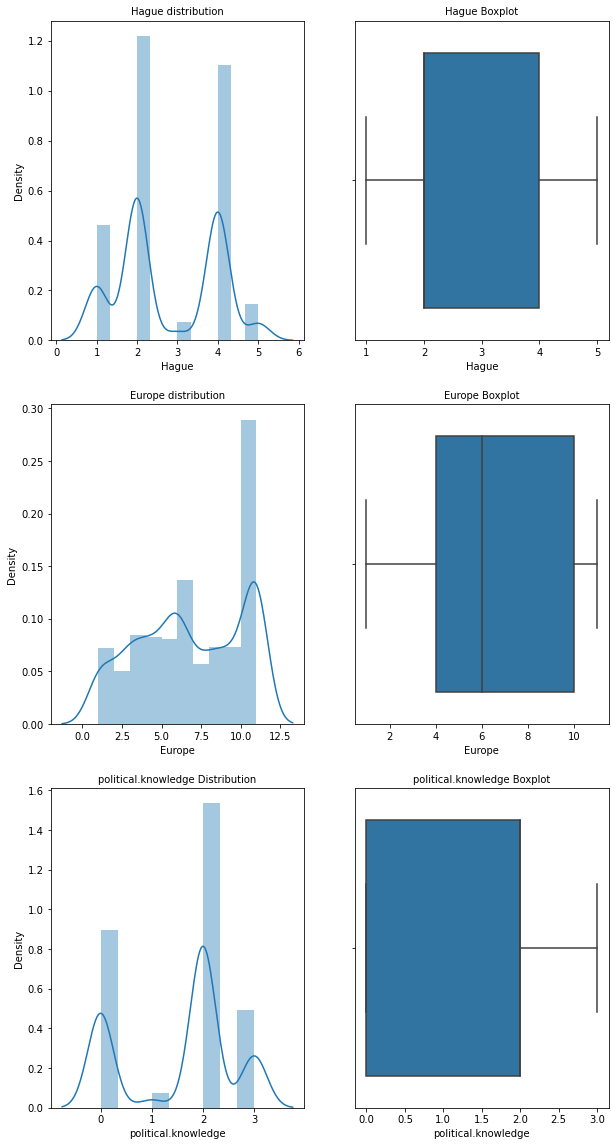

In [15]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,20)

a = sns.distplot(df['Hague'] , ax=axes[0][0])
a.set_title("Hague distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(df['Europe'] , ax=axes[1][0])
a.set_title("Europe distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[1][1])
a.set_title("Europe Boxplot",fontsize=10)


a = sns.distplot(df['political.knowledge'] , ax=axes[2][0])
a.set_title("political.knowledge Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[2][1])
a.set_title("political.knowledge Boxplot",fontsize=10)

plt.show()

In [16]:
df_num=df.select_dtypes(['float64','int64'])
df_cat=df.select_dtypes(['object'])

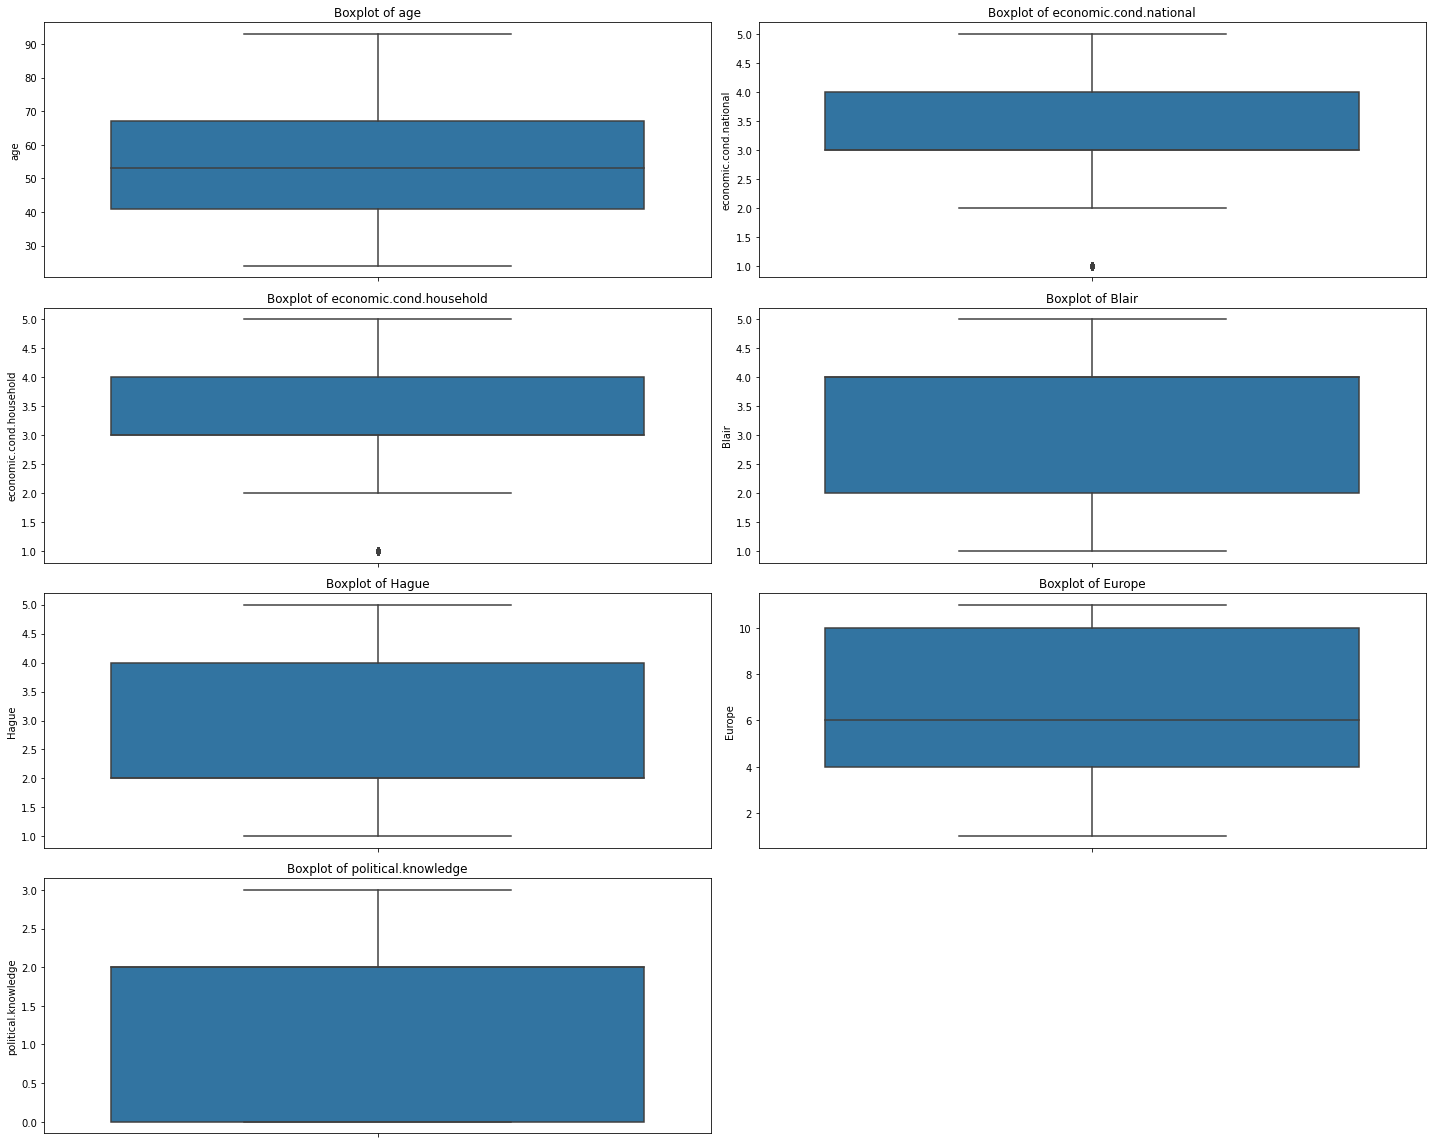

In [17]:
plt.figure(figsize=(20,16))
feature_list=df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4,2, i+1)
    sns.boxplot(y=df_num[feature_list[i]], data=df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [18]:
df.groupby(["vote"]).count()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,,,,,,,,
Conservative,460,460,460,460,460,460,460,460
Labour,1057,1057,1057,1057,1057,1057,1057,1057


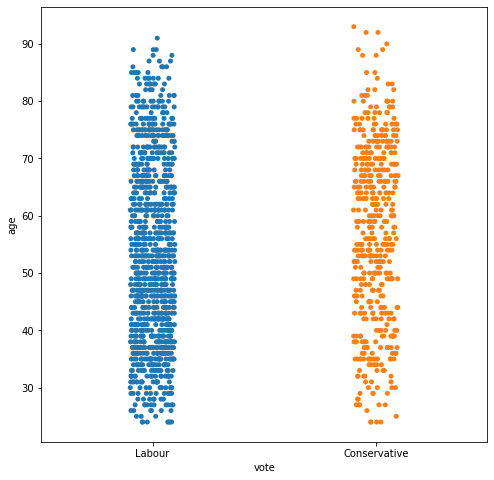

In [19]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['age'], jitter=True) 
plt.show()


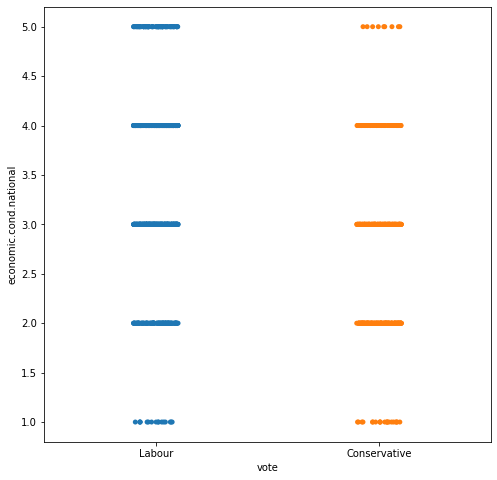

In [20]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['economic.cond.national'], jitter=True) 
plt.show()

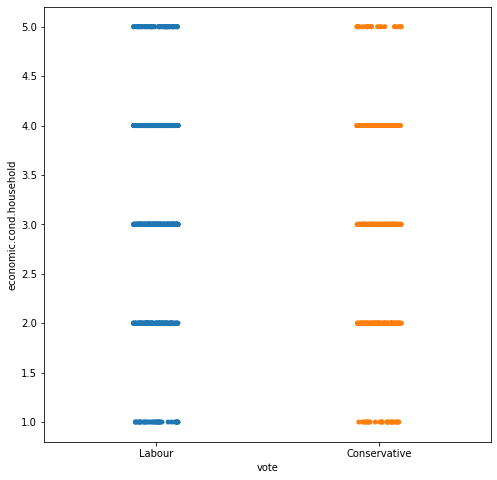

In [21]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['economic.cond.household'], jitter=True) 
plt.show()

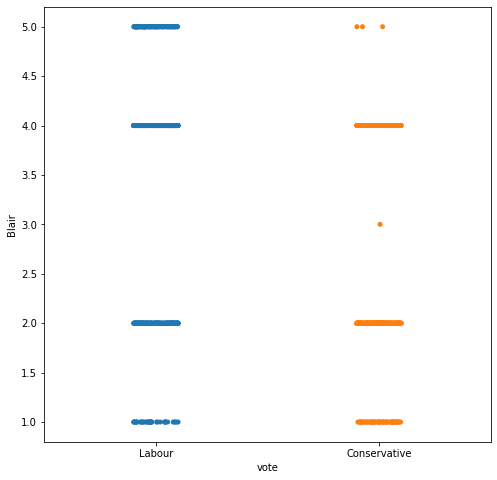

In [22]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Blair'], jitter=True) 
plt.show()

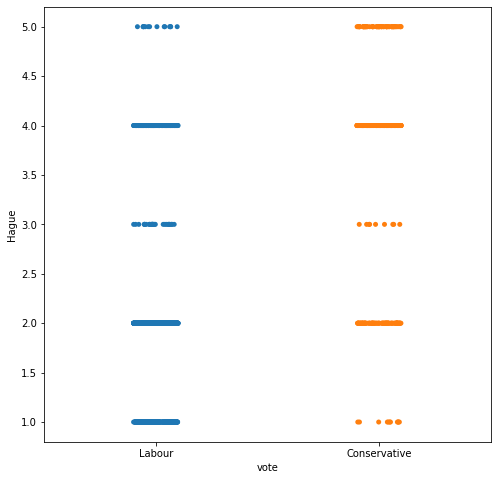

In [23]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Hague'], jitter=True) 
plt.show()

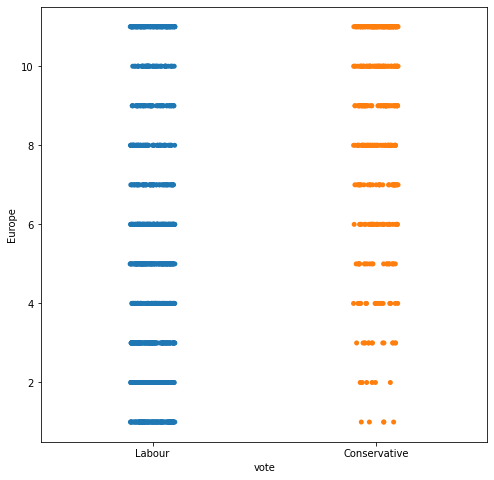

In [24]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Europe'], jitter=True) 
plt.show()

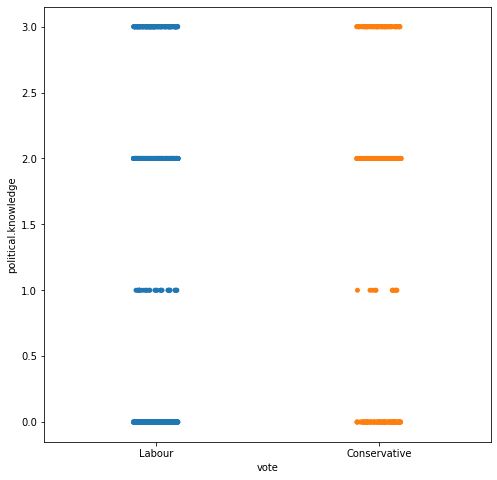

In [25]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['political.knowledge'], jitter=True) 
plt.show()

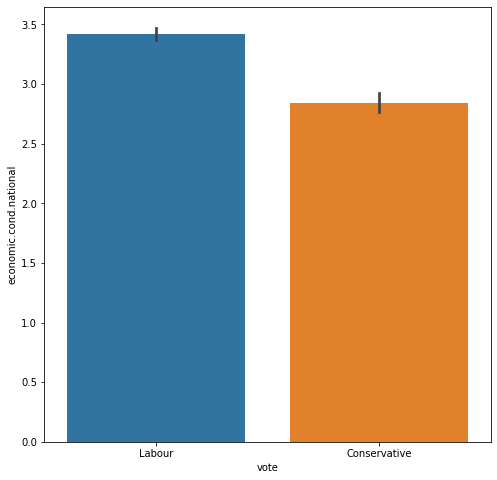

In [26]:
plt.figure(figsize=(8,8))
sns.barplot(x="vote", y="economic.cond.national", data=df)
plt.show()

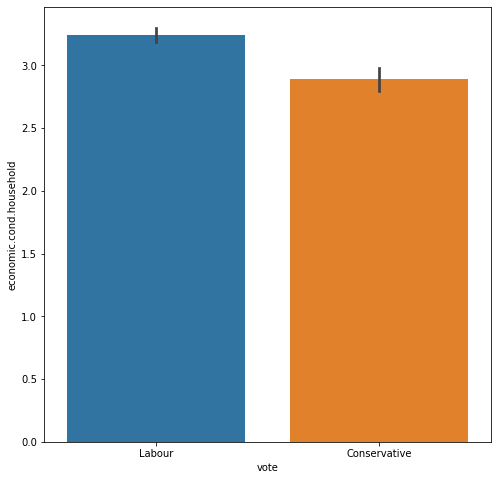

In [27]:
plt.figure(figsize=(8,8))
sns.barplot(x="vote", y="economic.cond.household", data=df)
plt.show()

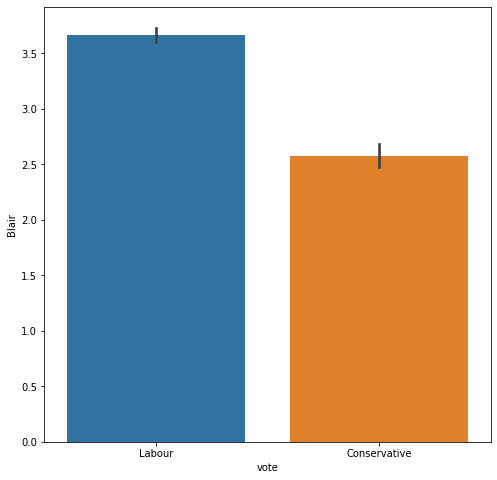

In [28]:
plt.figure(figsize=(8,8))
sns.barplot(x="vote", y="Blair", data=df)
plt.show()

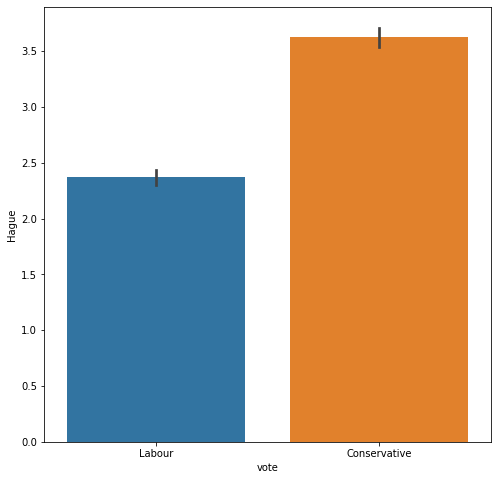

In [29]:
plt.figure(figsize=(8,8))
sns.barplot(x="vote", y="Hague", data=df)
plt.show()

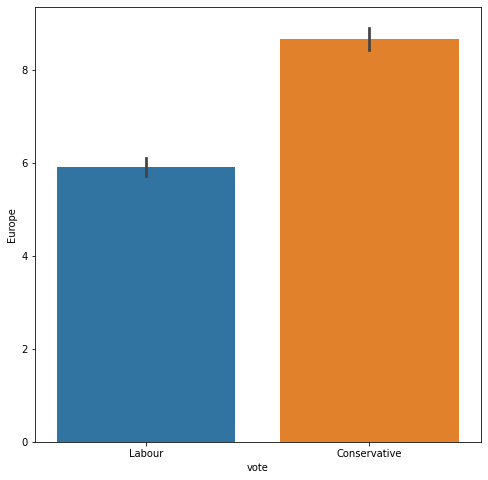

In [30]:
plt.figure(figsize=(8,8))
sns.barplot(x="vote", y="Europe", data=df)
plt.show()

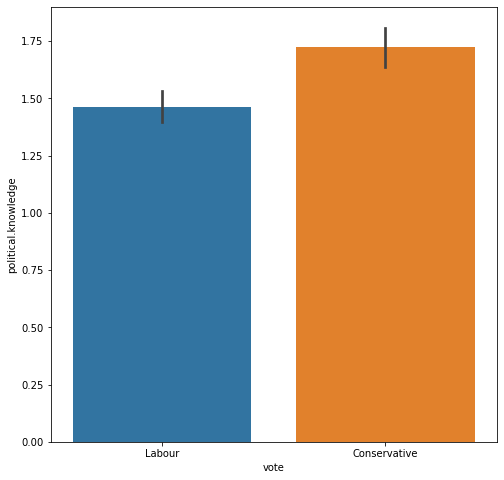

In [31]:
plt.figure(figsize=(8,8))
sns.barplot(x="vote", y="political.knowledge", data=df)
plt.show()

In [32]:
def univariateAnalysis_category(df_cat):
    print("Details of " + df_cat)
    print("----------------------------------------------------------------")
    print(df[df_cat].value_counts())
    
    plt.figure()
    df[df_cat].value_counts().plot.bar(title="Frequency Distribution of " + df_cat)
    plt.show()
    print("       ")

Details of vote
----------------------------------------------------------------
Labour          1057
Conservative     460
Name: vote, dtype: int64


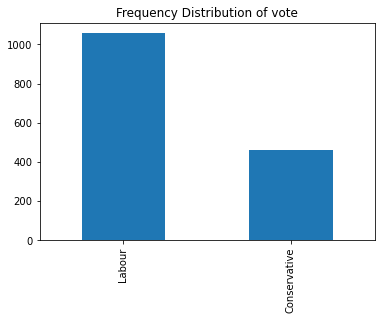

       
Details of gender
----------------------------------------------------------------
female    808
male      709
Name: gender, dtype: int64


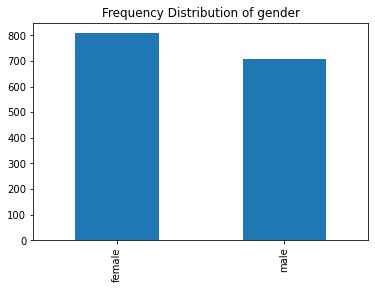

In [33]:
for x in df_cat:
    univariateAnalysis_category(x)

**BIVARIATE ANALYSIS**

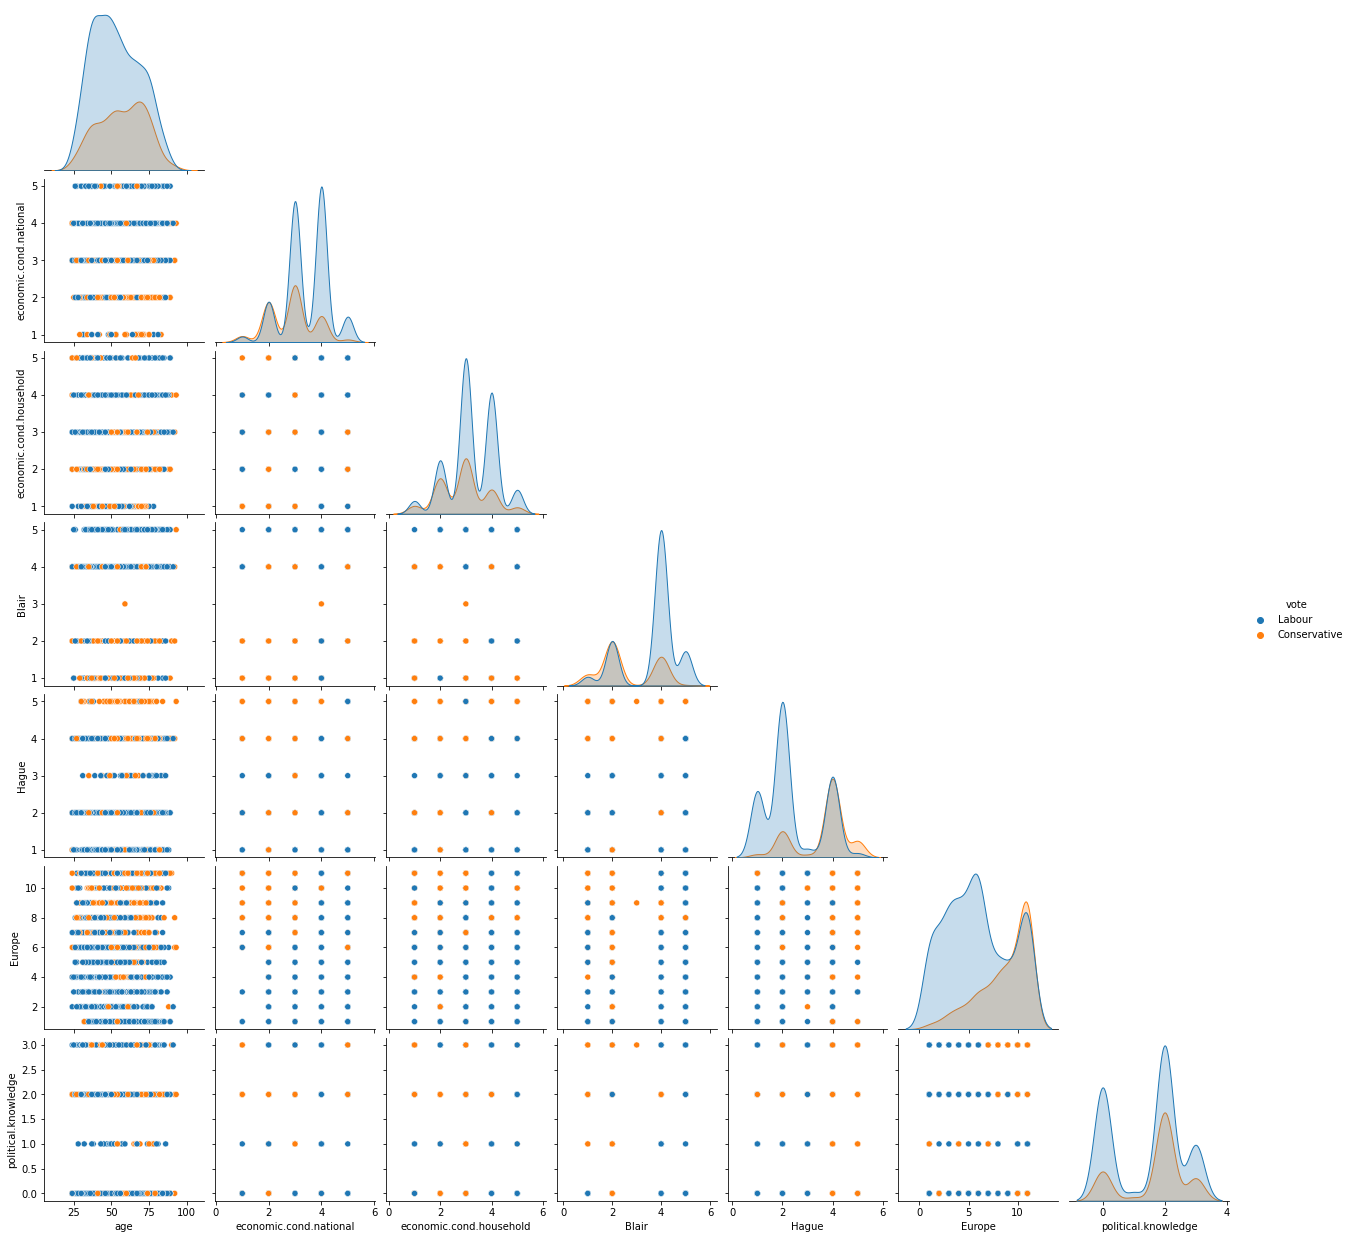

In [34]:
sns.pairplot(df, hue='vote', corner='True')

In [35]:
corr=df_num.corr(method='pearson')

<AxesSubplot:>

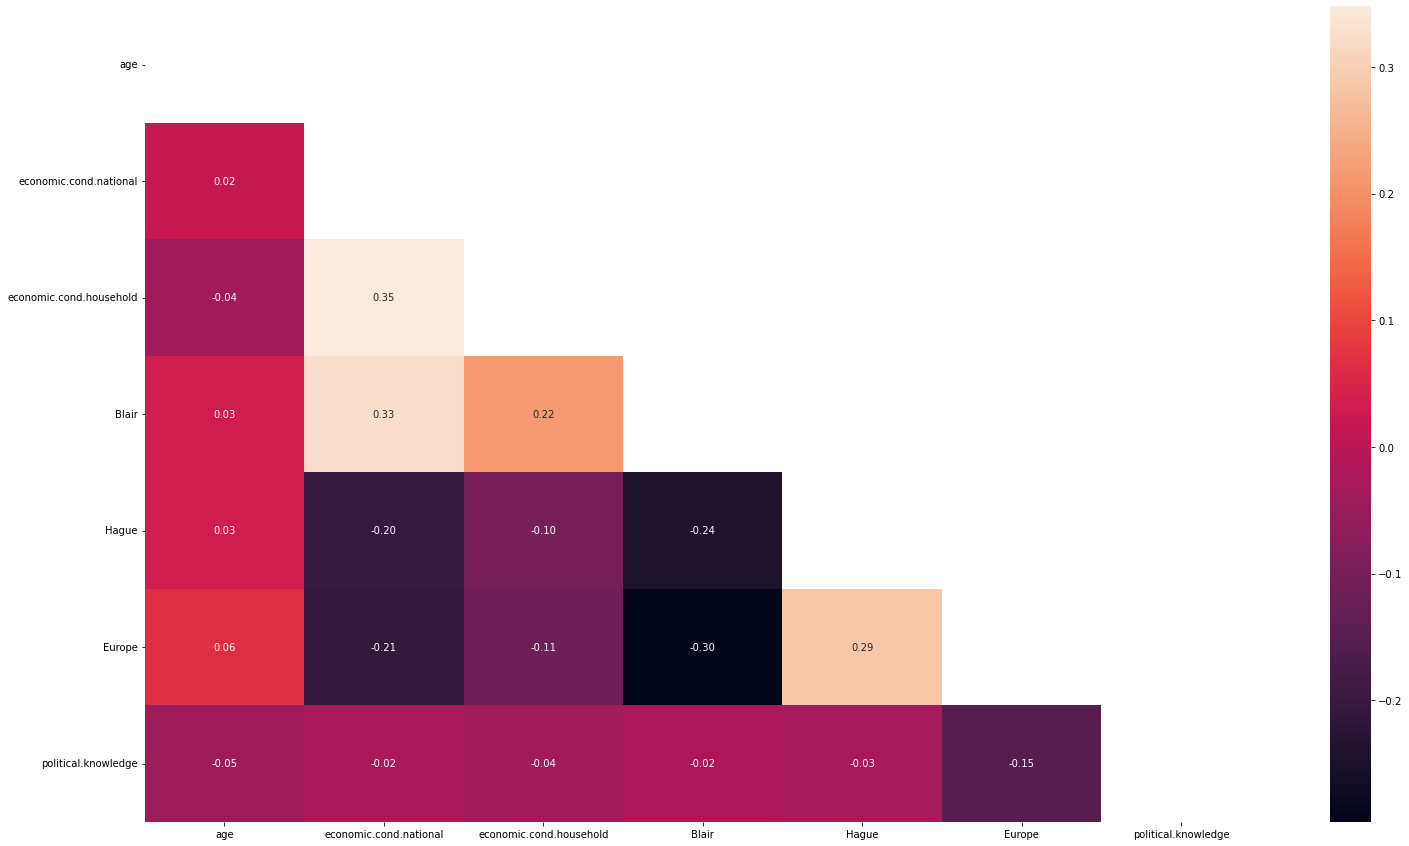

In [36]:
mask=np.triu(np.ones_like(corr,dtype=np.bool))
fig=plt.subplots(figsize=(25,15))
sns.heatmap(df_num.corr(), annot=True, fmt='.2f',mask=mask)

Encoding

We will be using label encoding for vote which is our dependant variable. 

In [14]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [15]:
df["vote"] =df["vote"].astype('category')

In [16]:
df['vote']=np.where(df['vote'] =='Labour', '1', df['vote'])
df['vote']=np.where(df['vote'] =='Conservative', '0', df['vote'])

We will be using one hot encoding for gender

In [17]:
df = pd.get_dummies(df,columns=['gender'])

In [18]:
df.head().T

,0,1,2,3,4
vote,1,1,1,1,1
age,43,36,35,24,41
economic.cond.national,3,4,4,4,2
economic.cond.household,3,4,4,2,2
Blair,4,4,5,2,1
Hague,1,4,2,1,1
Europe,2,5,3,4,6
political.knowledge,2,2,2,0,2
gender_female,1,0,0,1,0
gender_male,0,1,1,0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender_female            1517 non-null   uint8 
 9   gender_male              1517 non-null   uint8 
dtypes: int64(7), object(1), uint8(2)
memory usage: 109.6+ KB


In [20]:
df['vote'] = pd.Categorical(df['vote']).codes

In [21]:
df.dtypes

vote                        int8
age                        int64
economic.cond.national     int64
economic.cond.household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political.knowledge        int64
gender_female              uint8
gender_male                uint8
dtype: object

In [22]:
d1=df.copy()

Splitting the data


In [23]:
X = d1.drop('vote', axis=1)
y = d1[['vote']]

**Applying Logistic Regression**

In [24]:
test_size = 0.30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=d1['vote'], random_state=7)
type(X_train)

pandas.core.frame.DataFrame

In [48]:
X_train.shape

(1061, 9)

In [49]:
X_test.shape

(456, 9)

In [50]:
y_train.shape

(1061, 1)

In [51]:
y_test.shape

(456, 1)

In [52]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=500,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   10.6s finished


LogisticRegression(max_iter=500, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

Predicting on Training and Test dataset

In [53]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [54]:
ytrain_predict

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [55]:
ytest_predict

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,

Getting the Predicted Classes and Probs

In [56]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.069433,0.930567
1,0.039108,0.960892
2,0.318630,0.681370
3,0.403560,0.596440
4,0.698644,0.301356


In [57]:
ytest_predict_prob

array([[0.06943326, 0.93056674],
       [0.03910759, 0.96089241],
       [0.31863034, 0.68136966],
       [0.4035597 , 0.5964403 ],
       [0.69864371, 0.30135629],
       [0.79642692, 0.20357308],
       [0.15690445, 0.84309555],
       [0.0467933 , 0.9532067 ],
       [0.03518978, 0.96481022],
       [0.89175204, 0.10824796],
       [0.30234544, 0.69765456],
       [0.7305107 , 0.2694893 ],
       [0.0614359 , 0.9385641 ],
       [0.21838249, 0.78161751],
       [0.0149603 , 0.9850397 ],
       [0.4377828 , 0.5622172 ],
       [0.05569809, 0.94430191],
       [0.00651868, 0.99348132],
       [0.01673007, 0.98326993],
       [0.49007318, 0.50992682],
       [0.13783825, 0.86216175],
       [0.00406507, 0.99593493],
       [0.67366966, 0.32633034],
       [0.00234518, 0.99765482],
       [0.13953943, 0.86046057],
       [0.12675994, 0.87324006],
       [0.18006264, 0.81993736],
       [0.28483704, 0.71516296],
       [0.26138527, 0.73861473],
       [0.29120435, 0.70879565],
       [0.

In [58]:
ytrain_predict_prob=model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.615981,0.384019
1,0.155271,0.844729
2,0.269243,0.730757
3,0.124054,0.875946
4,0.025522,0.974478


In [59]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8416588124410933

**AUC and ROC for the training data**

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

AUC: 0.892


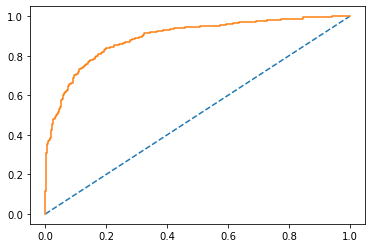

In [61]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [62]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8289473684210527

**AUC and ROC for the test data**

AUC: 0.892


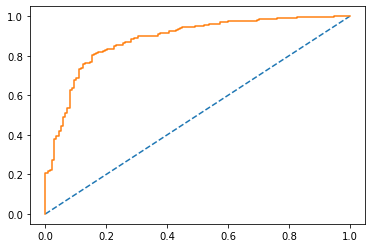

In [63]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

Confusion Matrix for the training data

In [64]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [65]:
confusion_matrix(y_train, ytrain_predict)

array([[218, 104],
       [ 64, 675]], dtype=int64)

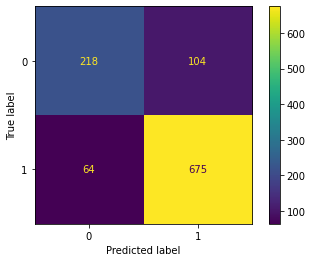

In [66]:
plot_confusion_matrix(model,X_train,y_train);

In [67]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       322
           1       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



**Confusion Matrix for test data**

In [68]:
confusion_matrix(y_test, ytest_predict)

array([[ 91,  47],
       [ 31, 287]], dtype=int64)

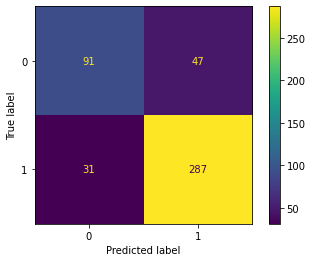

In [69]:
plot_confusion_matrix(model,X_test,y_test);

In [70]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       138
           1       0.86      0.90      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.82      0.83      0.83       456



# <a>Applying GridSearcCV for Logistic Regression</a>

In [71]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [72]:
grid={'penalty':['l2','none'],
      'solver':['liblinear','lbfgs'],
      'tol':[0.0001,0.00001]}

In [73]:
model = LogisticRegression(max_iter=500,n_jobs=2)

In [74]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [75]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['liblinear', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [76]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(max_iter=500, n_jobs=2, solver='liblinear')


In [77]:
best_model = grid_search.best_estimator_

In [78]:
# Prediction on the training set
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [79]:
## Getting the probabilities on the test set
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.065556,0.934444
1,0.036516,0.963484
2,0.329204,0.670796
3,0.383775,0.616225
4,0.705408,0.294592


              precision    recall  f1-score   support

           0       0.76      0.67      0.72       322
           1       0.86      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061
 



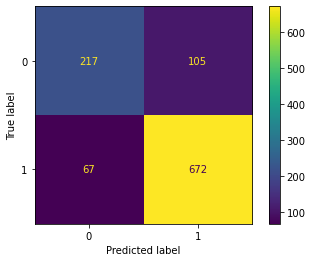

In [80]:
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       138
           1       0.86      0.90      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.82      0.83      0.82       456
 



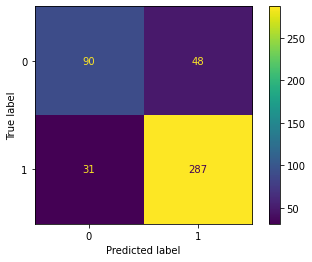

In [81]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

**Applying LDA**

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [83]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,y)
model

LinearDiscriminantAnalysis()

**Generate Coefficients and intercept for the Linear Discriminant Function**

In [84]:
#intercept value
clf.intercept_ 

array([3.55541444])

In [85]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-0.02348839,  0.42722063,  0.07376585,  0.76223865, -0.96233945,
        -0.23141154, -0.50481148, -0.02909544,  0.02909544]])

In [86]:
X_train.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'gender_female',
       'gender_male'],
      dtype='object')

Linear Discriminant Function

In [87]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.02,  0.43,  0.07,  0.76, -0.96, -0.23, -0.5 , -0.03,  0.03]])

By the above equation and the coefficients it is clear that predictor 'Hague' has the largest magnitude thus this helps in classifying the best predictor 'age' has the smallest magnitude thus this helps in classifying the least.

In [88]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

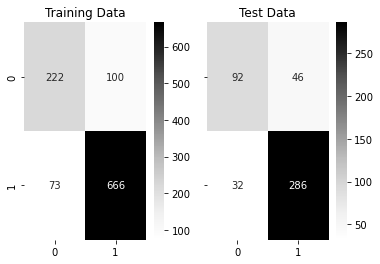

In [89]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [90]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.69      0.72       322
           1       0.87      0.90      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.83      0.84      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.74      0.67      0.70       138
           1       0.86      0.90      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456
 



Probability prediction for the training and test data

In [91]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [92]:
pred_prob_train[:,1]

array([0.32464354, 0.87406315, 0.7204845 , ..., 0.96439766, 0.66016145,
       0.95413191])

AUC for the Training Data: 0.891


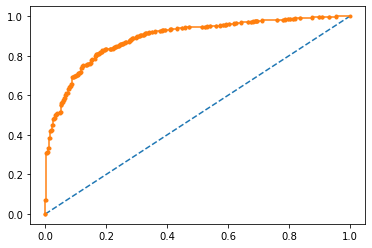

In [93]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


AUC for the Test Data: 0.885


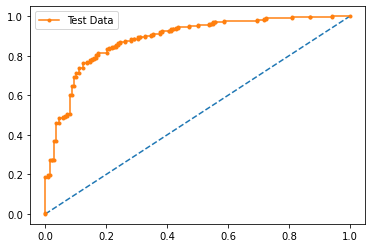

In [94]:
# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**Gaussian Naive Bayes**

In [95]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [96]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. 
After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its 
parameters.

**Performance Matrix on train data set**

In [97]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8341187558906692
[[231  91]
 [ 85 654]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       322
           1       0.88      0.88      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.80      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [98]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.8245614035087719
[[ 96  42]
 [ 38 280]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       138
           1       0.87      0.88      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



Accuracy of our Gaussian Naive Bayes model

In [99]:
NB_model.score(X_train, y_train)

0.8341187558906692

In [100]:
NB_model.score(X_test, y_test)

0.8245614035087719

**Looking at Recalls, Training accuracy and Test accuracy. Model seems to be performing well

## KNN Model

For naive bayes algorithm while calculating likelihoods of numerical features it assumes the feature to be normally distributed and then we calculate probability using mean and variance of that feature only and also it assumes that all the predictors are independent to each other. Scale doesn’t matter. Performing a features scaling in this algorithms may not have much effect.

**Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered**

Now lets apply zscore on continues columns and see the performance for KNN

In [101]:
d5=d1.copy()

In [25]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8567389255419415
[[235  87]
 [ 65 674]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       322
           1       0.89      0.91      0.90       739

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.83      1061
weighted avg       0.85      0.86      0.86      1061



In [27]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7785087719298246
[[ 84  54]
 [ 47 271]]
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       138
           1       0.83      0.85      0.84       318

    accuracy                           0.78       456
   macro avg       0.74      0.73      0.73       456
weighted avg       0.78      0.78      0.78       456



**Default value n_neighbors=5, lets check the performance for K=7**

In [28]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [29]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8473138548539114
[[225  97]
 [ 65 674]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       322
           1       0.87      0.91      0.89       739

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [30]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7785087719298246
[[ 81  57]
 [ 44 274]]
              precision    recall  f1-score   support

           0       0.65      0.59      0.62       138
           1       0.83      0.86      0.84       318

    accuracy                           0.78       456
   macro avg       0.74      0.72      0.73       456
weighted avg       0.77      0.78      0.78       456



**Run the KNN with no of neighbours to be 1,3,5..17 and *Find the optimal number of neighbours from K=1,3,5,7....17 using the Mis classification error**

Hint: Misclassification error **(MCE) = 1 - Test accuracy score.** Calculated MCE for each model with neighbours = 1,3,5...17 and find the model with lowest MCE

In [31]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....17
for k in range(1,18,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2478070175438597,
 0.22587719298245612,
 0.2214912280701754,
 0.2214912280701754,
 0.2214912280701754,
 0.21052631578947367,
 0.20614035087719296,
 0.21271929824561409,
 0.21052631578947367]

**Plot misclassification error vs k (with k value on X-axis) using matplotli**

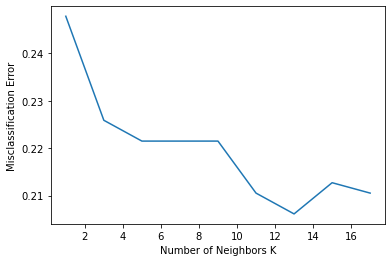

In [33]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,18,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K = 15 it is giving the best test accuracy lets check train and test for K=17 with other evaluation metrics

In [110]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [111]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8350612629594723
[[210 112]
 [ 63 676]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.71       322
           1       0.86      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [112]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7872807017543859
[[ 79  59]
 [ 38 280]]
              precision    recall  f1-score   support

           0       0.68      0.57      0.62       138
           1       0.83      0.88      0.85       318

    accuracy                           0.79       456
   macro avg       0.75      0.73      0.74       456
weighted avg       0.78      0.79      0.78       456



In [113]:
0.8166666666666667 - 0.6928571428571428

0.12380952380952381

**As the difference between train and test accuracies is 12.38 % which is more than 10%(Industry standard).So, we will look for the next best value of K. which is K=19**

In [114]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=19)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [115]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8303487276154571
[[207 115]
 [ 65 674]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       322
           1       0.85      0.91      0.88       739

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [116]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7894736842105263
[[ 75  63]
 [ 33 285]]
              precision    recall  f1-score   support

           0       0.69      0.54      0.61       138
           1       0.82      0.90      0.86       318

    accuracy                           0.79       456
   macro avg       0.76      0.72      0.73       456
weighted avg       0.78      0.79      0.78       456



In [117]:
0.8 - 0.7142857142857143

0.08571428571428574

In [ ]:
jfdfdlkfjd

**As the difference between train and test accuracies is less than 10%, it is a valid model**

### Naive Bayes Model

In [118]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [119]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [120]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.8341187558906692
[[231  91]
 [ 85 654]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       322
           1       0.88      0.88      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.80      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [121]:
y_test.value_counts()

vote
1       318
0       138
dtype: int64

In [122]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[ 96  42]
 [ 38 280]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       138
           1       0.87      0.88      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



#### The most important Model Evaluation metric here is Recall. Recall (red cells) is a measurement of the proportion of correct       ####  positive results, and is also known as the True Positive Rate, or Sensitivity.
#### Reason:
#### i)Accuracy is not considered because we have an imbalanced dataset.
#### ii)Our main goal here is to reduce the Type-2 error i.e False-Negative. 
####                For e.g Consider a person actually has cancer and the model model predicted no cancer. This can be a disaster.

## Ada Boost

In [123]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [124]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8557964184731386
[[235  87]
 [ 66 673]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       322
           1       0.89      0.91      0.90       739

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.83      1061
weighted avg       0.85      0.86      0.85      1061



In [125]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8048245614035088
[[ 87  51]
 [ 38 280]]
              precision    recall  f1-score   support

           0       0.70      0.63      0.66       138
           1       0.85      0.88      0.86       318

    accuracy                           0.80       456
   macro avg       0.77      0.76      0.76       456
weighted avg       0.80      0.80      0.80       456



## Gradient Boosting

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [127]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[258  64]
 [ 50 689]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       322
           1       0.92      0.93      0.92       739

    accuracy                           0.89      1061
   macro avg       0.88      0.87      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [128]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8267543859649122
[[ 90  48]
 [ 31 287]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       138
           1       0.86      0.90      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.82      0.83      0.82       456



## Random Forest

In [129]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [130]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[322   0]
 [  0 739]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [131]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8070175438596491
[[ 93  45]
 [ 43 275]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       138
           1       0.86      0.86      0.86       318

    accuracy                           0.81       456
   macro avg       0.77      0.77      0.77       456
weighted avg       0.81      0.81      0.81       456



## SMOTE 

In [132]:
# !pip install imbalanced-learn

In [135]:
from imblearn.over_sampling import SMOTE

In [136]:
sm = SMOTE(random_state=2)
Y_train = y_train.values.ravel()
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

## Naive Bayes with SMOTE

In [138]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [139]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [140]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8328822733423545
[[609 130]
 [117 622]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       739
           1       0.83      0.84      0.83       739

    accuracy                           0.83      1478
   macro avg       0.83      0.83      0.83      1478
weighted avg       0.83      0.83      0.83      1478



In [141]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7960526315789473
[[102  36]
 [ 57 261]]
              precision    recall  f1-score   support

           0       0.64      0.74      0.69       138
           1       0.88      0.82      0.85       318

    accuracy                           0.80       456
   macro avg       0.76      0.78      0.77       456
weighted avg       0.81      0.80      0.80       456



## KNN With SMOTE

In [142]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [143]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8951285520974289
[[714  25]
 [130 609]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       739
           1       0.96      0.82      0.89       739

    accuracy                           0.90      1478
   macro avg       0.90      0.90      0.89      1478
weighted avg       0.90      0.90      0.89      1478



In [144]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.75
[[103  35]
 [ 79 239]]
              precision    recall  f1-score   support

           0       0.57      0.75      0.64       138
           1       0.87      0.75      0.81       318

    accuracy                           0.75       456
   macro avg       0.72      0.75      0.73       456
weighted avg       0.78      0.75      0.76       456



## Cross Validation on Naive Bayes Model

In [145]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.83108108, 0.7972973 , 0.7972973 , 0.80405405, 0.84459459,
       0.86486486, 0.86486486, 0.81081081, 0.84353741, 0.84353741])

In [146]:
scores = cross_val_score(NB_SM_model, X_test, y_test, cv=10)
scores

array([0.73913043, 0.93478261, 0.65217391, 0.86956522, 0.7826087 ,
       0.86956522, 0.84444444, 0.84444444, 0.8       , 0.82222222])